# External Dependencies of Java Artifacts with Neo4j
<br>  

### References
- [jqassistant](https://jqassistant.org)
- [py2neo](https://py2neo.org/2021.1/)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plot
from py2neo import Graph

In [2]:
# Please set the environment variable "NEO4J_INITIAL_PASSWORD" in your shell 
# before starting jupyter notebook to provide the password for the user "neo4j". 
# It is not recommended to hardcode the password into jupyter notebook for security reasons.
graph = Graph("bolt://localhost:7687", auth=("neo4j", os.environ.get("NEO4J_INITIAL_PASSWORD")))

In [3]:
def get_cypher_query_from_file(filename):
    with open(filename) as file:
        return ' '.join(file.readlines())

In [4]:
def query_cypher_to_data_frame(filename):
    return graph.run(get_cypher_query_from_file(filename)).to_data_frame()

In [5]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [6]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [7]:
# Main Colormap
main_color_map = 'nipy_spectral'

## External Package Usage

### External Package

A package is categorized as "external" if it is utilized as a dependency, or if any of its enclosed types are used as dependencies, but the code within it has not been analyzed (missing bytecode). This also applies to all build-in Java types, but they are explicitly filtered out here.

### External annotation dependency

The aforementioned classification encompasses external annotation dependencies as well. These dependencies introduce significantly less coupling and are not indispensable for compiling code. Without the external annotation the code would most probably behave differently. Hence, they are included in the first more overall and general tables and then left out in the later more specific ones.

### Table 1 - Top 20 most used external packages overall

This table shows the external packages that are used by the most different internal types overall.
Additionally, it shows which types of the external package are actually used. External annotations are also listed.

**Columns:**
- *externalPackageName* identifies the external package as described above
- *numberOfExternalTypeCaller* refers to the distinct types that make use of the external package
- *numberOfExternalTypeCalls* includes every invocation or reference to the types in the external package
- *allTypes* represents the total count of all analyzed types in general
- *externalTypeNames* contains a list of actually utilized types of the external package

In [8]:
external_package_usage=query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_overall.cypher")

# Select columns and only show the first 20 entries (head)
external_package_usage.head(20)

,externalPackageName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,allTypes,externalTypeNames
0,javax.annotation,316,1371,2494,"[Nonnull, Nullable, PreDestroy]"
1,org.slf4j,186,516,2494,"[Logger, LoggerFactory]"
2,javax.persistence,72,324,2494,"[IdClass, MappedSuperclass, Id, Table, Index, ..."
3,jakarta.persistence,63,312,2494,"[MappedSuperclass, IdClass, Id, EntityExistsEx..."
4,org.hamcrest,61,498,2494,"[Matcher, StringDescription, CoreMatchers, Des..."
5,com.fasterxml.jackson.annotation,54,84,2494,"[JsonGetter, JsonProperty, JsonTypeInfo$Id, Js..."
6,org.quartz,37,226,2494,"[JobDataMap, JobExecutionException, Scheduler,..."
7,reactor.core.publisher,31,124,2494,"[Flux, Mono, FluxSink$OverflowStrategy, FluxSi..."
8,com.fasterxml.jackson.databind,15,73,2494,"[DeserializationContext, JsonDeserializer, Jso..."
9,org.reactivestreams,12,29,2494,[Publisher]


### Chart 1 - Most called external packages in %

Packages that are used less than 0.7% are grouped into the name "others" to get a cleaner chart
with the most significant external packages and how ofter they are called in percent.

In [9]:
external_package_usage_significant = external_package_usage.copy();

# Add column "percentOfExternalTypeCalls" with the percentage of the "numberOfExternalTypeCalls".
external_package_usage_significant['percentOfExternalTypeCalls'] = external_package_usage_significant['numberOfExternalTypeCalls'] / external_package_usage_significant['numberOfExternalTypeCalls'].sum() * 100

# Change the external package name to "others" if it is called less than 0.7 percent
external_package_usage_significant.loc[external_package_usage_significant['percentOfExternalTypeCalls'] < 0.7, 'externalPackageName'] = 'others'

# Group external package name (foremost the new "others" entries) and sum their "percentOfExternalTypeCalls"
external_package_usage_significant = external_package_usage_significant.groupby('externalPackageName')['percentOfExternalTypeCalls'].sum()

# Sort by "percentOfExternalTypeCalls" descending
external_package_usage_significant.sort_values(ascending=False, inplace=True)

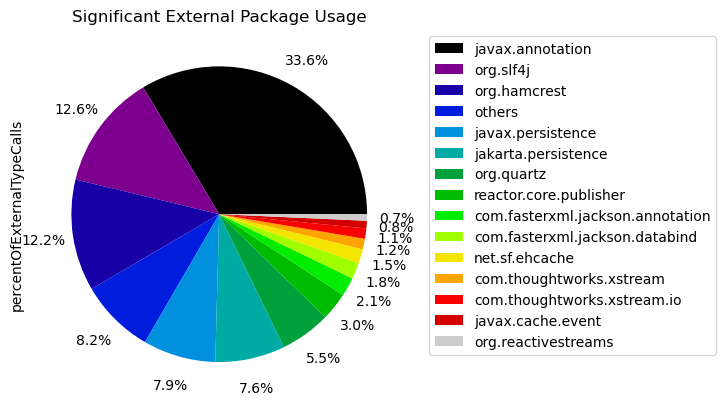

In [10]:
plot.figure();

# Set the name of the index to artifactName
#external_package_usage_significant=external_package_usage_significant.set_index('externalPackageName')

axis = external_package_usage_significant.plot(
    #y='numberOfExternalTypeCalls', 
    kind='pie',
    title='Significant External Package Usage',
    legend=True,
    labeldistance=None,
    autopct='%1.1f%%',
    pctdistance=1.2,
    cmap=main_color_map
)
axis.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plot.show()

### Table 2 - Top 20 least used external packages overall

This table identifies external packages that aren't used very often. This could help to find libraries that aren't actually needed or maybe easily replaceable. Some of them might be used sparsely on purpose for example as an adapter to an external library that is actually important. Thus, decisions need to be made on a case-by-case basis.

**Columns:**
- *externalPackageName* identifies the external package as described above
- *numberOfExternalTypeCalls* includes every invocation or reference to the types in the external package

In [11]:
# Sort by number of external type calls
external_package_least_used=external_package_usage.sort_values(by='numberOfExternalTypeCalls', ascending=True)

# Reset index
external_package_least_used = external_package_least_used.reset_index(drop=True)

# Select columns and only show the first 10 entries (head)
external_package_least_used[['externalPackageName','numberOfExternalTypeCalls']].head(20)


,externalPackageName,numberOfExternalTypeCalls
0,org.junit.rules,1
1,org.junit.jupiter.api,1
2,javax.xml.stream,2
3,org.junit.runner,2
4,reactor.core,2
5,org.testcontainers.containers.wait.strategy,2
6,com.fasterxml.jackson.datatype.jsr310,2
7,org.quartz.impl.matchers,2
8,org.dom4j.io,3
9,reactor.util.concurrent,3


### Table 3 - External usage per artifact

The following table shows the most used external packages separately for each artifact including external annotations. 

**Columns:**
- *artifactName* is used to group the the external package usage per artifact for a more detailed analysis.
- *externalPackageName* identifies the external package as described above
- *numberOfExternalTypeCaller* refers to the distinct types that make use of the external package
- *numberOfExternalTypeCalls* includes every invocation or reference to the types in the external package
- *numberOfTypesInArtifact* represents the total count of all analyzed types for the artifact
- *externalTypeNames* contains a list of actually utilized types of the external package

In [12]:
query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_artifact.cypher")

,artifactName,externalPackageName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,numberOfTypesInArtifact,externalTypeNames
0,axon-configuration-4.7.5,javax.annotation,12,104,39,[Nonnull]
1,axon-configuration-4.7.5,org.slf4j,9,28,39,"[LoggerFactory, Logger]"
2,axon-disruptor-4.7.5,org.slf4j,11,20,22,"[Logger, LoggerFactory]"
3,axon-disruptor-4.7.5,com.lmax.disruptor,8,24,22,"[RingBuffer, EventHandler, LifecycleAware, Exc..."
4,axon-disruptor-4.7.5,javax.annotation,5,18,22,[Nonnull]
...,...,...,...,...,...,...
61,axon-test-4.7.5,org.junit.runners.model,2,8,85,[Statement]
62,axon-test-4.7.5,org.slf4j,2,3,85,"[LoggerFactory, Logger]"
63,axon-test-4.7.5,org.junit.rules,1,1,85,[TestRule]
64,axon-test-4.7.5,org.junit.runner,1,2,85,[Description]


### Table 4 - External usage per artifact and package

The next table lists internal packages and the artifacts they belong to that use many different external types of a specific external package without taken external annotations into account. Only the first 30 rows are shown.

**Columns:**
- *artifactName* that contains the type that calls the external package
- *fullPackageName* is the package within the artifact that contains the type that calls the external package
- *externalPackageName* identifies the external package as described above
- *numberOfExternalTypeCaller* refers to the distinct types that make use of the external package
- *numberOfExternalTypeCalls* includes every invocation or reference to the types in the external package
- *numberOfTypesInPackage* represents the total count of all types in that package
- *externalTypeNames* contains a list of actually utilized types of the external package
- *packageName* contains the name of the package (last part of *fullPackageName*)

In [13]:
external_package_usage_per_package = query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_artifact_and_package.cypher")
external_package_usage_per_package.head(30)

,artifactName,fullPackageName,externalPackageName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,numberOfTypesInPackage,externalTypeNames,packageName
0,axon-test-4.7.5,org.axonframework.test.matchers,org.hamcrest,38,188,24,"[Description, Matcher, BaseMatcher, TypeSafeMa...",matchers
1,axon-messaging-4.7.5,org.axonframework.queryhandling,reactor.core.publisher,24,90,40,"[Flux, Mono, Signal, FluxSink$OverflowStrategy...",queryhandling
2,axon-messaging-4.7.5,org.axonframework.eventhandling.scheduling.quartz,org.quartz,19,95,6,"[TriggerBuilder, SchedulerContext, JobDataMap,...",quartz
3,axon-messaging-4.7.5,org.axonframework.deadline.quartz,org.quartz,18,131,4,"[JobDataMap, Scheduler, TriggerBuilder, Trigge...",quartz
4,axon-messaging-4.7.5,org.axonframework.serialization.json,com.fasterxml.jackson.databind,15,73,7,"[DeserializationContext, JsonDeserializer, Obj...",json
5,axon-messaging-4.7.5,org.axonframework.eventhandling,org.slf4j,13,47,93,"[Logger, LoggerFactory]",eventhandling
6,axon-messaging-4.7.5,org.axonframework.eventhandling.pooled,org.slf4j,13,59,20,"[Logger, LoggerFactory]",pooled
7,axon-disruptor-4.7.5,org.axonframework.disruptor.commandhandling,org.slf4j,11,20,22,"[LoggerFactory, Logger]",commandhandling
8,axon-configuration-4.7.5,org.axonframework.config,org.slf4j,9,28,39,"[Logger, LoggerFactory]",config
9,axon-test-4.7.5,org.axonframework.test.saga,org.hamcrest,9,91,21,"[CoreMatchers, Matcher, Description, StringDes...",saga


### Table 5 - Top 20 external package usage per type

This table lists the internal types that utilize the most different external types and packages. These have the highest probability of change depending on external libraries. A case-by-case approach is also advisable here because there could for example also be code units that encapsulate an external library and have this high count of external dependencies on purpose.

**Columns:**
- *artifactName* that contains the type that calls the external package
- *fullPackageName* is the package within the artifact that contains the type that calls external types
- *typeName* identifies the internal type within the package and artifact that calls external types
- *numberOfExternalTypeCaller* and *numberOfExternalTypes* refers to the distinct external types that are used by the internal type
- *numberOfExternalTypeCalls* includes every invocation or reference to the types in the external package
- *numberOfTypesInPackage* represents the total count of all types in that package
- *numberOfExternalPackages* shows how many different external packages are used by the internal type
- *externalPackageNames* contains the list of names of the different external packages that are used by the internal type
- *externalTypeNames* contains a list of actually utilized types of the external package
- *packageName* contains the name of the package (last part of *fullPackageName*)

In [14]:
external_package_usage_per_type = query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_type.cypher")
external_package_usage_per_type.head(20)

,artifactName,fullPackageName,typeName,numberOfExternalTypeCaller,numberOfExternalTypeCalls,numberOfExternalPackages,numberOfExternalTypes,externalPackageNames,externalTypeNames,packageName,fullTypeName
0,axon-messaging-4.7.5,org.axonframework.serialization.json,JacksonSerializer,9,29,6,9,"[com.fasterxml.jackson.core, com.fasterxml.jac...",[com.fasterxml.jackson.core.JsonProcessingExce...,json,org.axonframework.serialization.json.JacksonSe...
1,axon-messaging-4.7.5,org.axonframework.serialization.xml,XStreamSerializer,7,22,5,7,"[com.thoughtworks.xstream.io.xml, com.thoughtw...","[com.thoughtworks.xstream.io.xml.Dom4JReader, ...",xml,org.axonframework.serialization.xml.XStreamSer...
2,axon-disruptor-4.7.5,org.axonframework.disruptor.commandhandling,DisruptorCommandBus,6,34,4,6,"[org.slf4j, com.lmax.disruptor.dsl, com.lmax.d...","[org.slf4j.LoggerFactory, com.lmax.disruptor.d...",commandhandling,org.axonframework.disruptor.commandhandling.Di...
3,axon-messaging-4.7.5,org.axonframework.deadline.quartz,QuartzDeadlineManager,13,78,4,13,"[org.quartz, javax.annotation, org.slf4j, org....","[org.quartz.TriggerBuilder, org.quartz.Trigger...",quartz,org.axonframework.deadline.quartz.QuartzDeadli...
4,axon-messaging-4.7.5,org.axonframework.messaging.responsetypes,MultipleInstancesResponseType,7,17,4,7,"[reactor.core.publisher, com.fasterxml.jackson...","[reactor.core.publisher.Flux, com.fasterxml.ja...",responsetypes,org.axonframework.messaging.responsetypes.Mult...
5,axon-messaging-4.7.5,org.axonframework.queryhandling,SimpleQueryUpdateEmitter,13,33,4,13,"[org.reactivestreams, reactor.core.publisher, ...","[org.reactivestreams.Publisher, reactor.core.p...",queryhandling,org.axonframework.queryhandling.SimpleQueryUpd...
6,axon-messaging-4.7.5,org.axonframework.serialization,GapAwareTrackingTokenConverter,6,25,4,6,"[com.thoughtworks.xstream.converters, com.thou...",[com.thoughtworks.xstream.converters.Marshalli...,serialization,org.axonframework.serialization.GapAwareTracki...
7,axon-messaging-4.7.5,org.axonframework.serialization,AbstractXStreamSerializer$MetaDataConverter,6,14,4,6,"[com.thoughtworks.xstream.io, com.thoughtworks...",[com.thoughtworks.xstream.io.HierarchicalStrea...,serialization,org.axonframework.serialization.AbstractXStrea...
8,axon-messaging-4.7.5,org.axonframework.serialization,GapAwareTrackingTokenConverter$ReflectivelyCon...,6,25,4,6,"[com.thoughtworks.xstream.io, com.thoughtworks...",[com.thoughtworks.xstream.io.HierarchicalStrea...,serialization,org.axonframework.serialization.GapAwareTracki...
9,axon-messaging-4.7.5,org.axonframework.serialization.json,MetaDataDeserializer,6,21,4,6,"[com.fasterxml.jackson.databind, com.fasterxml...",[com.fasterxml.jackson.databind.Deserializatio...,json,org.axonframework.serialization.json.MetaDataD...


### Table 6 - External package usage distribution per type

The next table shown here only includes the first 20 rows.
It shows how many types use one external package, how many use two, etc. .
This gives an overview of the distribution of external package calls and the overall coupling to external libraries. The higher the count of distinct external packages the lower should be the count of types that use them. Dependencies to external annotations are left out here.

Have a look above to find out which types have the highest external package dependency usage.

**Columns:**
- *artifactName* that contains the type that calls the external package
- *artifactTypes* the total count of types in the artifact
- *numberOfExternalPackages* the number of distinct external packages used
- *numberOfTypes* in the artifact where the *numberOfExternalPackages* applies
- *numberOfTypesPercentage* in the artifact where the *numberOfExternalPackages* applies in %

In [15]:
external_package_usage_per_type_distribution = query_cypher_to_data_frame("../cypher/External_Dependencies/External_package_usage_per_type_distribution.cypher")
external_package_usage_per_type_distribution[['artifactName', 'artifactTypes', 'numberOfExternalPackages', 'numberOfTypes', 'numberOfTypesPercentage']].head(20)

,artifactName,artifactTypes,numberOfExternalPackages,numberOfTypes,numberOfTypesPercentage
0,axon-configuration-4.7.5,39,1,5,12.820513
1,axon-disruptor-4.7.5,22,1,2,9.090909
2,axon-disruptor-4.7.5,22,2,4,18.181818
3,axon-disruptor-4.7.5,22,3,2,9.090909
4,axon-eventsourcing-4.7.5,130,1,12,9.230769
5,axon-eventsourcing-4.7.5,130,2,3,2.307692
6,axon-eventsourcing-4.7.5,130,3,2,1.538462
7,axon-messaging-4.7.5,729,1,99,13.580247
8,axon-messaging-4.7.5,729,2,29,3.978052
9,axon-messaging-4.7.5,729,3,4,0.548697


### Table 7 - External package usage distribution in percentage

The following table uses the same data as Table 6 but has a column per internal artifact and a row for the number of different external packages used. The values are the percentages of types that fulfill both conditions so they belong to artifact and have the exact count of different external packages used. Dependencies to external annotations are left out here.

In [16]:

# Organize artifacts in columns with the number of types as values using pivot
# Every row represents the number of external packages
external_package_usage_per_type_distribution=external_package_usage_per_type_distribution.pivot(index='numberOfExternalPackages', columns='artifactName', values='numberOfTypesPercentage')

# Fill missing values with zero
external_package_usage_per_type_distribution.fillna(0, inplace=True)

# Convert to integer
# external_package_usage_per_type_distribution=external_package_usage_per_type_distribution.astype(int)

external_package_usage_per_type_distribution.head(10)

artifactName,axon-configuration-4.7.5,axon-disruptor-4.7.5,axon-eventsourcing-4.7.5,axon-messaging-4.7.5,axon-modelling-4.7.5,axon-test-4.7.5
numberOfExternalPackages,,,,,,
1,12.820513,9.090909,9.230769,13.580247,6.711409,31.764706
2,0.000000,18.181818,2.307692,3.978052,2.013423,2.352941
3,0.000000,9.090909,1.538462,0.548697,0.000000,3.529412
4,0.000000,0.000000,0.000000,0.548697,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.274348,0.000000,0.000000


### Chart 2 - External package usage distribution in percentage

The next chart shows the number of types per artifact that use the given number of different external packages as listed in Table 7. Dependencies to external annotations are left out here.

<Figure size 640x480 with 0 Axes>

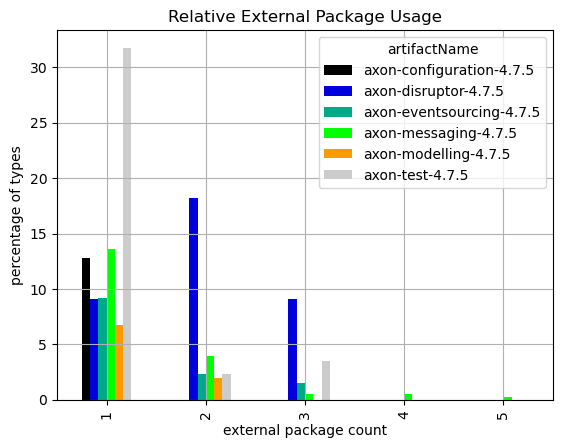

In [17]:
plot.figure();
axes = external_package_usage_per_type_distribution.plot(
    kind='bar', 
    grid=True,
    title='Relative External Package Usage', 
    xlabel='external package count',
    ylabel='percentage of types',
    cmap=main_color_map,
)
plot.show()

### Chart 3 - External package usage distribution in percentage stacked per artifact

The following chart shows a stacked bar for each artifact. Every color represents a different count of different external packages used. The y axis then shows how many percent of types (compared to all types of that artifact) use these external packages. By stacking them above each other it is easier to compare the artifacts and their external package usage. Dependencies to external annotations are left out here.

<Figure size 640x480 with 0 Axes>

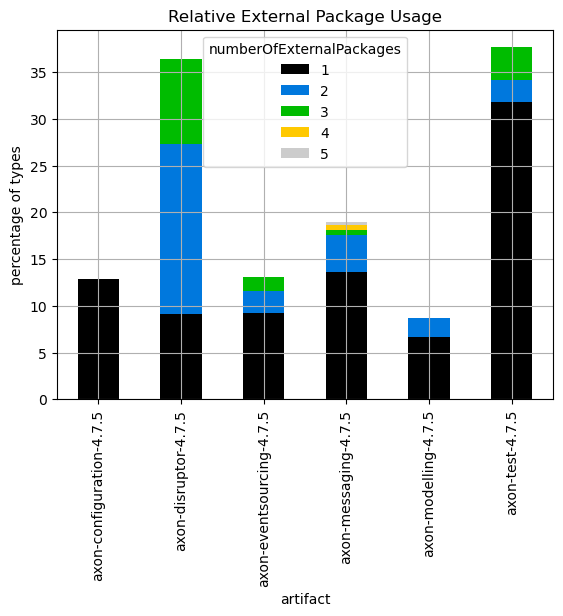

In [18]:
plot.figure();
axes = external_package_usage_per_type_distribution.transpose().plot(
    kind='bar', 
    grid=True,
    title='Relative External Package Usage', 
    xlabel='artifact',
    ylabel='percentage of types',
    stacked=True,
    cmap=main_color_map,
)
plot.show()

## Maven POMs


### Table 8 - Maven POMs and their declared dependencies

If Maven is used as for package and dependency management and a ".pom" file is included in the artifact, the following table shows the external dependencies that are declared there.

In [19]:
query_cypher_to_data_frame("../cypher/External_Dependencies/Maven_POMs_and_their_declared_dependencies.cypher")

,pom.artifactId,pom.name,scope,dependency.optional,dependentArtifact.group,dependentArtifact.name
0,axon-configuration,Axon Framework - Configuration,test,False,org.quartz-scheduler,quartz
1,axon-configuration,Axon Framework - Configuration,test,False,${project.groupId},axon-messaging
2,axon-configuration,Axon Framework - Configuration,test,True,io.projectreactor,reactor-core
3,axon-configuration,Axon Framework - Configuration,test,False,javax.inject,javax.inject
4,axon-configuration,Axon Framework - Configuration,test,False,org.hibernate,hibernate-core-jakarta
...,...,...,...,...,...,...
104,axon-test,Axon Framework - Test Fixtures,test,False,jakarta.persistence,jakarta.persistence-api
105,axon-test,Axon Framework - Test Fixtures,test,False,javax.inject,javax.inject
106,axon-test,Axon Framework - Test Fixtures,provided,False,com.google.code.findbugs,jsr305
107,axon-test,Axon Framework - Test Fixtures,default,True,org.hamcrest,hamcrest
